# Modeling of random processes. Distribution laws and characteristics of random processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Random process: waiting time.

A student has 4 bus routes available for his journey. The intervals for each route are: 10 minutes, 15 minutes, 12 minutes, and 18 minutes.

Determine the average waiting time and plot in one coordinate system the realizations of the random process (waiting time for each day of the year). Construct a graph of the average waiting time for each day of the year.

## Solution:

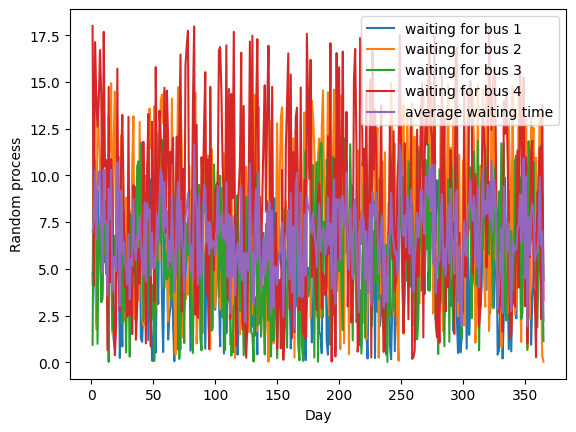

In [2]:
waiting_time = [10, 15, 12, 18]
realizations = np.array([np.random.rand(365) * time for time in waiting_time])
mean = np.mean(realizations, axis=0)

X = np.arange(1, 366, 1)
for i in range(len(waiting_time)):
  plt.plot(X, realizations[i], label=f'waiting for bus {i + 1}')
plt.plot(X, mean, label='average waiting time')

plt.xlabel('Day')
plt.ylabel('Random process')
plt.legend()
plt.draw()

## Task 2

Given a random process $X(t)=Ut^{2}+Vsin(t)$

Find:
- the mathematical expectation $mX(t)$
- the covariance function $KX(t1, t2)$
- the variance $DX(t)$ of the random process $X(t)$

if the random vector $(U,V)$ has the mathematical expectation $(1, -1)$ and the covariance matrix: $\begin{bmatrix} 0.2 & 0.1 \\ 0.1 & 0.3 \end{bmatrix}$

## Solution:

boring calculations:
- $M(U) = 1$
- $M(V) = -1$
- $0.2=cov(U, U)=D[U]$
- $0.1=cov(U, V)=cov(V, U)$
- $0.3=cov(V, V)=D[V]$
- $mX(t) = M[Ut^{2}+Vsin(t)] = t^{2}M[U] + sin(t)M[V] = t^{2} - sin(t)$
- $DX(t) = D[Ut^{2}+Vsin(t)] = D[Ut^{2}] + D[Vsin(t)] + 2cov(Ut^{2}, Vsin(t))=t^{4}D[U]+sin^{2}(t)D[V]+2t^{2}sin(t)cov(U, V)=0.2t^{4}+0.2t^{2}sin(t)+0.3sin^{2}(t)$
- $KX(t1, t2) = cov(X(t1), X(t2)) = cov(Ut_{1}^{2}+Vsin(t_{1}), Ut_{2}^{2}+Vsin(t_{2}))=t_{1}^{2}t_{2}^{2}cov(U, U) + t_{1}^{2}sin(t_{2})cov(U, V) + t_{2}^{2}sin(t_{1})cov(V, U) + sin(t_{1})sin(t_{2})cov(V, V)=0.2t_{1}^{2}t_{2}^{2} + 0.1t_{1}^{2}sin(t_{2}) + 0.1t_{2}^{2}sin(t_{1}) + 0.3sin(t_{1})sin(t_{2})$

In [3]:
def mathExp(t):
  return t**2 - np.sin(t)

def variance(t):
  return 0.2 * t**4 + 0.2 * t**2 * np.sin(t) + 0.3 * np.sin(t)**2

def covariance(t1, t2):
  return 0.2 * t1**2 * t2**2 + 0.1 * t1**2 * np.sin(t2) + 0.1 * t2**2 * np.sin(t1) + 0.3 * np.sin(t1) * np.sin(t2)

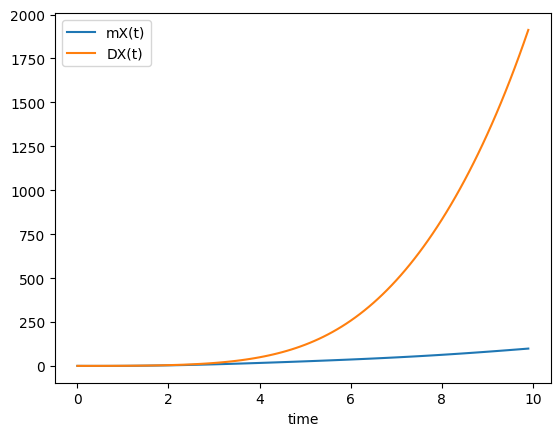

In [6]:
T = np.arange(0, 10, 0.1)
plt.plot(T, mathExp(T), label='mX(t)')
plt.plot(T, variance(T), label='DX(t)')
plt.xlabel('time')
plt.legend()
plt.draw()

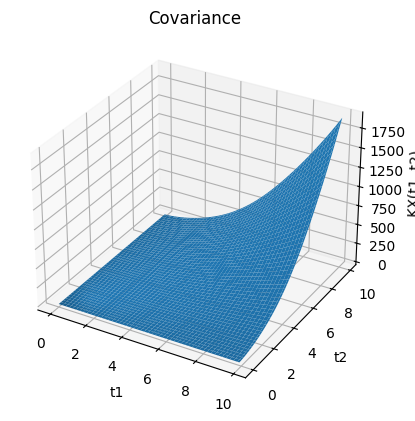

In [7]:
T1, T2 = np.meshgrid(T, T)
KX = covariance(T1, T2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T1, T2, KX)

ax.set_xlabel('t1')
ax.set_ylabel('t2')
ax.set_zlabel('KX(t1, t2)')
ax.set_title('Covariance')

plt.show()